# 1. 필요한 모듈과 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train.head(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN


# 2. 데이터 탐색 및 전처리

### 1) 데이터 shape와 column명 살펴보기

In [5]:
print("train 데이터 shape : ", train.shape)
print("test 데이터 shape : ", test.shape)

train 데이터 shape :  (4752, 60)
test 데이터 shape :  (11520, 41)


In [6]:
train.columns

Index(['id', 'X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08',
       'X09', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28',
       'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38',
       'X39', 'Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08',
       'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18'],
      dtype='object')

In [7]:
test.columns

Index(['id', 'X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08',
       'X09', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28',
       'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38',
       'X39'],
      dtype='object')

### 2) 데이터 결측치 확인

1. train 데이터

In [8]:
train.isnull().sum()[train.isnull().sum() > 0] # 결측치가 있는 컬럼만 출력

Y00     432
Y01     432
Y02     432
Y03     432
Y04     432
Y05     432
Y06     432
Y07     432
Y08     432
Y09     432
Y10     432
Y11     432
Y12     432
Y13     432
Y14     432
Y15     432
Y16     432
Y17     432
Y18    4320
dtype: int64

In [9]:
train[train['Y18'].isnull()].head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [10]:
train[train['Y18'].notnull()].head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
4320,4320,19.3,987.7,0.9,2.2,0.0,1007.7,988.0,20.8,1007.8,1007.4,0.0,0.0,93.2,162.5,0.0,312.8,0.0,0.0,0.5,0.0,87.0,0.0,1001.1,1008.2,1.1,257.5,0.0,1006.7,21.0,1000.1,87.6,18.0,18.7,1008.3,0.0,353.5,0.0,84.0,77.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.5
4321,4321,19.0,987.6,1.9,2.2,0.0,1007.7,988.0,20.6,1007.8,1007.4,0.0,0.0,93.7,317.4,0.0,308.9,0.0,0.0,0.1,0.0,89.2,0.0,1001.1,1008.2,0.4,262.5,0.1,1006.7,20.7,1000.1,86.4,17.7,19.0,1008.3,0.0,303.1,0.0,84.4,79.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.5
4322,4322,19.1,987.6,2.0,1.4,0.0,1007.8,988.1,20.5,1007.9,1007.4,0.0,0.0,93.6,0.0,0.0,294.1,0.0,0.0,0.0,0.0,89.2,0.0,1001.2,1008.2,0.1,343.5,0.0,1006.7,20.7,1000.1,85.7,17.4,19.2,1008.3,0.0,307.3,0.0,84.9,79.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.5
4323,4323,19.2,987.7,1.8,1.5,0.0,1007.9,988.1,20.5,1007.9,1007.5,0.0,0.0,93.7,0.0,0.0,297.6,0.0,0.0,0.0,0.0,89.8,0.0,1001.3,1008.2,0.0,0.0,0.0,1006.8,20.6,1000.1,85.1,17.5,19.3,1008.4,0.0,315.6,0.0,84.9,80.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.5
4324,4324,19.2,987.8,1.4,1.4,0.0,1007.9,988.1,20.5,1007.8,1007.6,0.0,0.0,93.9,0.0,0.0,277.4,0.0,0.0,0.0,0.0,89.7,0.0,1001.3,1008.3,0.0,0.0,0.0,1006.8,20.5,1000.2,84.9,17.4,19.5,1008.4,0.0,321.2,0.0,84.9,80.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.5


- 'Y00' ~ 'Y17' 컬럼의 값이 결측치이면 'Y18'의 값이 결측치가 아닙니다.
- 'Y18' 컬럼이 타겟이므로 결측치를 채워야합니다.

 - **'Y18' 컬럼의 결측치 대체**
     - 각 컬럼들의 중앙값으로 결측치를 대체합니다.

In [11]:
train.loc[train['Y18'].isnull(), 'Y00':'Y17'].median(axis=1)

0       10.00
1        9.50
2        9.25
3        9.00
4        8.75
        ...  
4315    20.50
4316    20.50
4317    20.00
4318    20.00
4319    19.75
Length: 4320, dtype: float64

In [12]:
train.loc[train['Y18'].isnull(), 'Y18'] = train.loc[train['Y18'].isnull(), 'Y00':'Y17'].median(axis=1)

train['Y18'].isnull().sum()

0

2. test 데이터

In [13]:
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

test 데이터에는 결측치가 없습니다.

### 3. 데이터 값 범위, 분포 확인

In [14]:
train.describe()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
count,4752.00000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.0,4752.000000,4752.0,4752.000000,4752.000000,4752.0,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4752.000000
mean,2375.50000,20.227904,988.621107,1.509764,1.453157,1.270223,1008.333902,989.005093,21.658081,1008.790341,1008.394171,1.006734,11.008479,68.209827,161.357639,0.0,174.346654,0.0,161.823864,1.377462,0.0,71.478872,1.138363,1001.773190,1008.850989,0.985059,139.524453,1.369886,1007.554924,22.079040,1000.811932,65.657639,19.846528,20.012984,1009.074747,11.567563,208.400505,1.533817,65.918771,58.178704,1.083123,21.324190,23.664583,23.623611,24.498958,24.510301,24.165856,22.530671,23.786574,24.016898,22.222801,23.737269,24.649653,23.641898,20.926157,21.319444,21.564468,22.969097,23.381829,22.951547
std,1371.92857,4.707570,3.359916,1.071858,0.936151,4.429852,3.395037,3.403714,4.377216,3.520317,3.546180,3.324415,10.873539,22.278053,98.787460,0.0,97.785811,0.0,115.943382,1.155024,0.0,21.830446,4.079039,3.367735,3.417633,1.091314,131.438036,1.240900,3.446475,4.225203,3.390206,21.525699,5.520259,5.271630,3.440669,11.386727,99.580562,5.578607,19.527173,18.368285,4.617366,4.309451,7.566614,7.423344,3.343437,3.437558,8.589213,7.468692,8.732548,9.832279,9.112299,10.599000,12.214870,8.400081,6.106031,7.066149,6.810084,8.054272,9.275172,7.389406
min,0.00000,8.300000,977.300000,0.000000,0.000000,0.000000,997.200000,978.100000,11.600000,997.300000,996.300000,0.000000,0.000000,16.400000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,19.700000,0.000000,990.800000,997.500000,0.000000,0.000000,0.000000,997.200000,10.300000,989.700000,17.400000,5.300000,5.500000,998.700000,0.000000,0.000000,0.000000,17.500000,17.900000,0.000000,11.500000,7.000000,7.000000,16.000000,15.500000,7.500000,6.500000,7.500000,7.000000,3.500000,4.000000,3.000000,6.000000,7.500000,7.500000,7.000000,6.000000,7.000000,7.250000
25%,1187.75000,16.900000,986.800000,0.700000,0.800000,0.000000,1006.500000,987.100000,18.400000,1006.700000,1006.300000,0.000000,0.020000,49.500000,69.225000,0.0,115.600000,0.0,33.875000,0.500000,0.0,53.075000,0.000000,999.900000,1006.900000,0.000000,0.000000,0.300000,1005.500000,19.000000,998.900000,48.075000,16.000000,16.300000,1007.075000,0.030000,155.300000,0.000000,51.500000,44.600000,0.000000,18.000000,17.500000,17.500000,22.000000,22.000000,17.500000,16.500000,17.000000,17.000000,15.500000,15.500000,15.000000,17.000000,16.500000,16.500000,16.500000,16.500000,16.000000,17.000000
50%,2375.50000,19.900000,988.600000,1.300000,1.300000,0.000000,1008.500000,989.100000,21.200000,1008.800000,1008.400000,0.000000,7.690000,72.150000,182.600000,0.0,170.250000,0.0,190.450000,1.000000,0.0,74.200000,0.000000,1001.900000,1008.900000,0.700000,134.150000,1.100000,1007.700000,21.700000,1000.900000,69.400000,19.400000,19.600000,1009.200000,8.210000,240.850000,0.000000,67.300000,59.100000,0.000000,21.000000,22.000000,22.000000,24.500000,24.500000,22.000000,21.000000,21.500000,21.000000,20.000000,20.500000,21.000000,22.000000,19.500000,19.500000,20.000000,21.500000,20.000000,21.000000
75%,3563.25000,24.100000,991.000000,2.100000,2.000000,0.000000,1010.800000,991.600000,24.825000,1011.400000,1010.900000,0.000000,22.190000,89.025000,228.9

- 'X04', 'X10', 'X14', 'X16', 'X19', 'X21','X36', 'X39' 컬럼의 평균, 1사분위수, 2사분위수, 3사분위수가 0인 것을 알 수 있습니다.
- 해당 컬럼들의 값을 시각화해서 확인해봅니다.

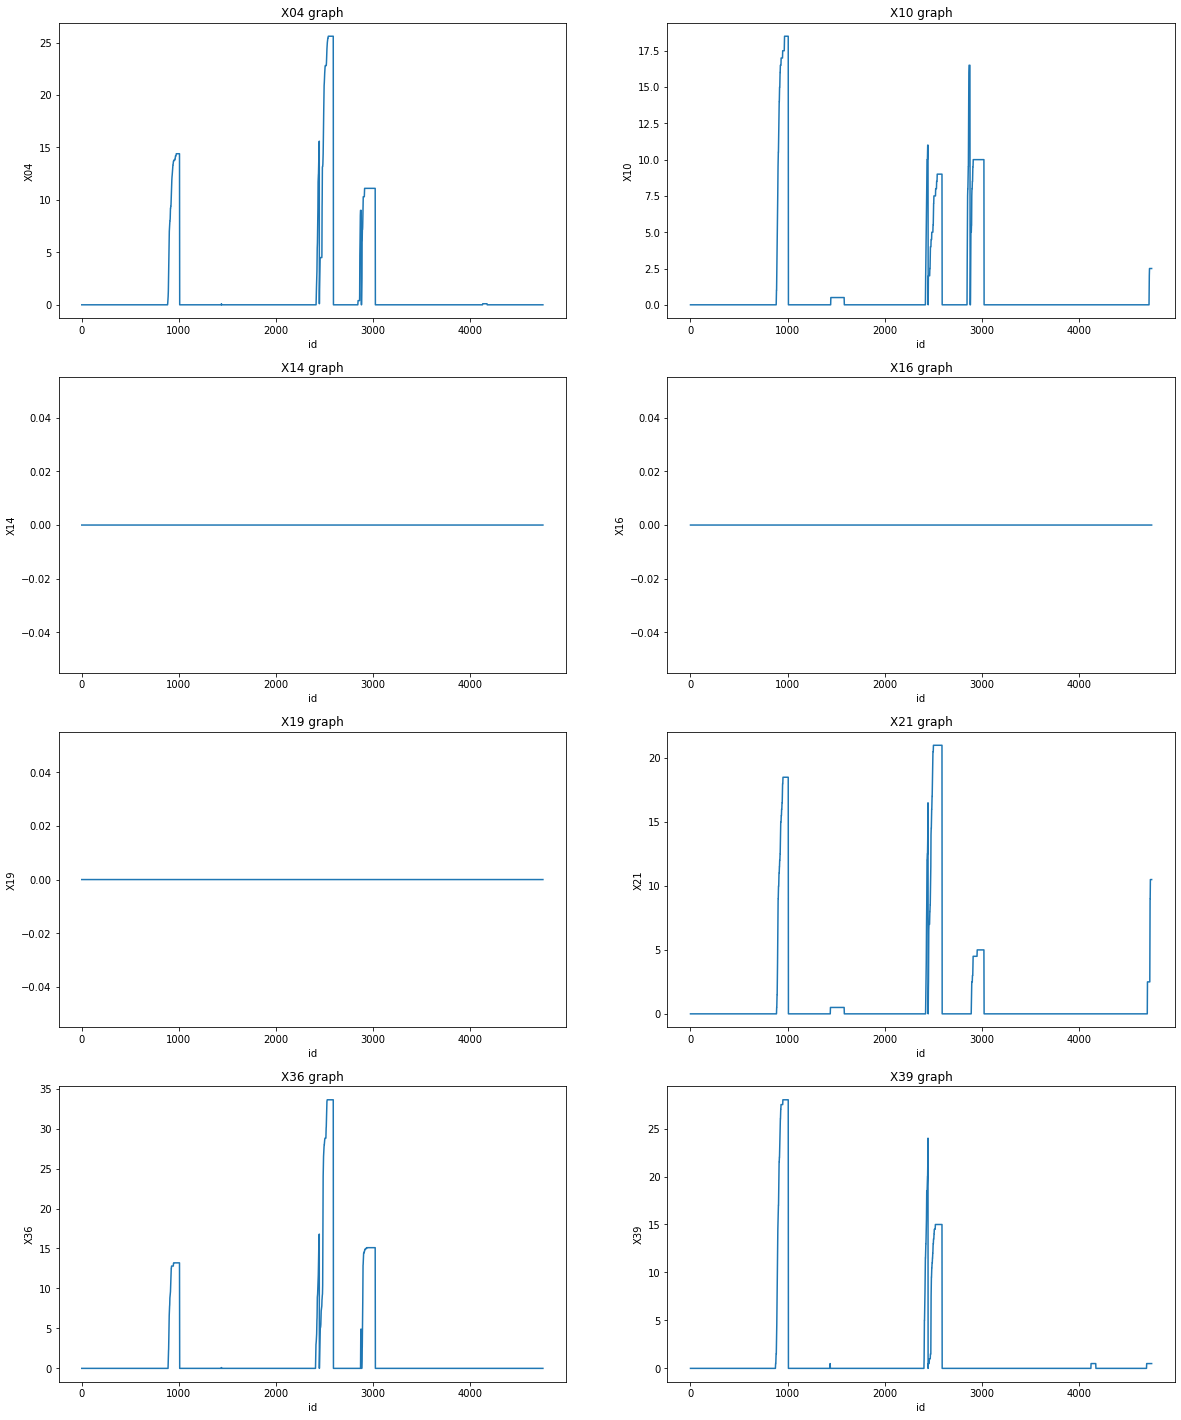

In [15]:
column_names = ['X04', 'X10', 'X14', 'X16', 'X19', 'X21','X36', 'X39']


fig, ax = plt.subplots(figsize=(20, 25), nrows=4, ncols=2)

for index, column in enumerate(column_names):
    sns.lineplot(data=train, x='id', y=column, ax=ax[index//2][index%2])
    ax[index//2][index%2].set_title(column + ' graph')

- 'X14', 'X16', 'X19' 컬럼의 데이터가 다 0인 것을 알 수 있습니다. 따라서 해당 컬럼들은 데이터프레임에서 제외해야합니다.

In [16]:
# 필요없는 세 개의 컬럼을 제외하기
delete_column = ['X14', 'X16', 'X19']
train = train.drop(delete_column, axis=1)
test = test.drop(delete_column, axis=1)

In [17]:
train.columns

Index(['id', 'X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08',
       'X09', 'X10', 'X11', 'X12', 'X13', 'X15', 'X17', 'X18', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'Y00', 'Y01',
       'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11',
       'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18'],
      dtype='object')

In [18]:
test.columns

Index(['id', 'X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08',
       'X09', 'X10', 'X11', 'X12', 'X13', 'X15', 'X17', 'X18', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39'],
      dtype='object')

- target 컬럼인 'Y18'을 시각화해보기

In [19]:
print(train['Y18'].min(), train['Y18'].max())

7.25 41.5


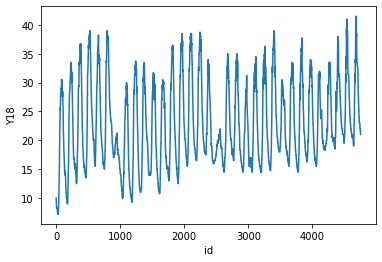

In [20]:
sns.lineplot(data=train, x='id', y='Y18')

- scatterplot을 이용해 X 컬럼들과 Y18 컬럼 데이터 분포 확인하기

In [21]:
train.columns[1:38]

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X15', 'X17', 'X18', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39'],
      dtype='object')

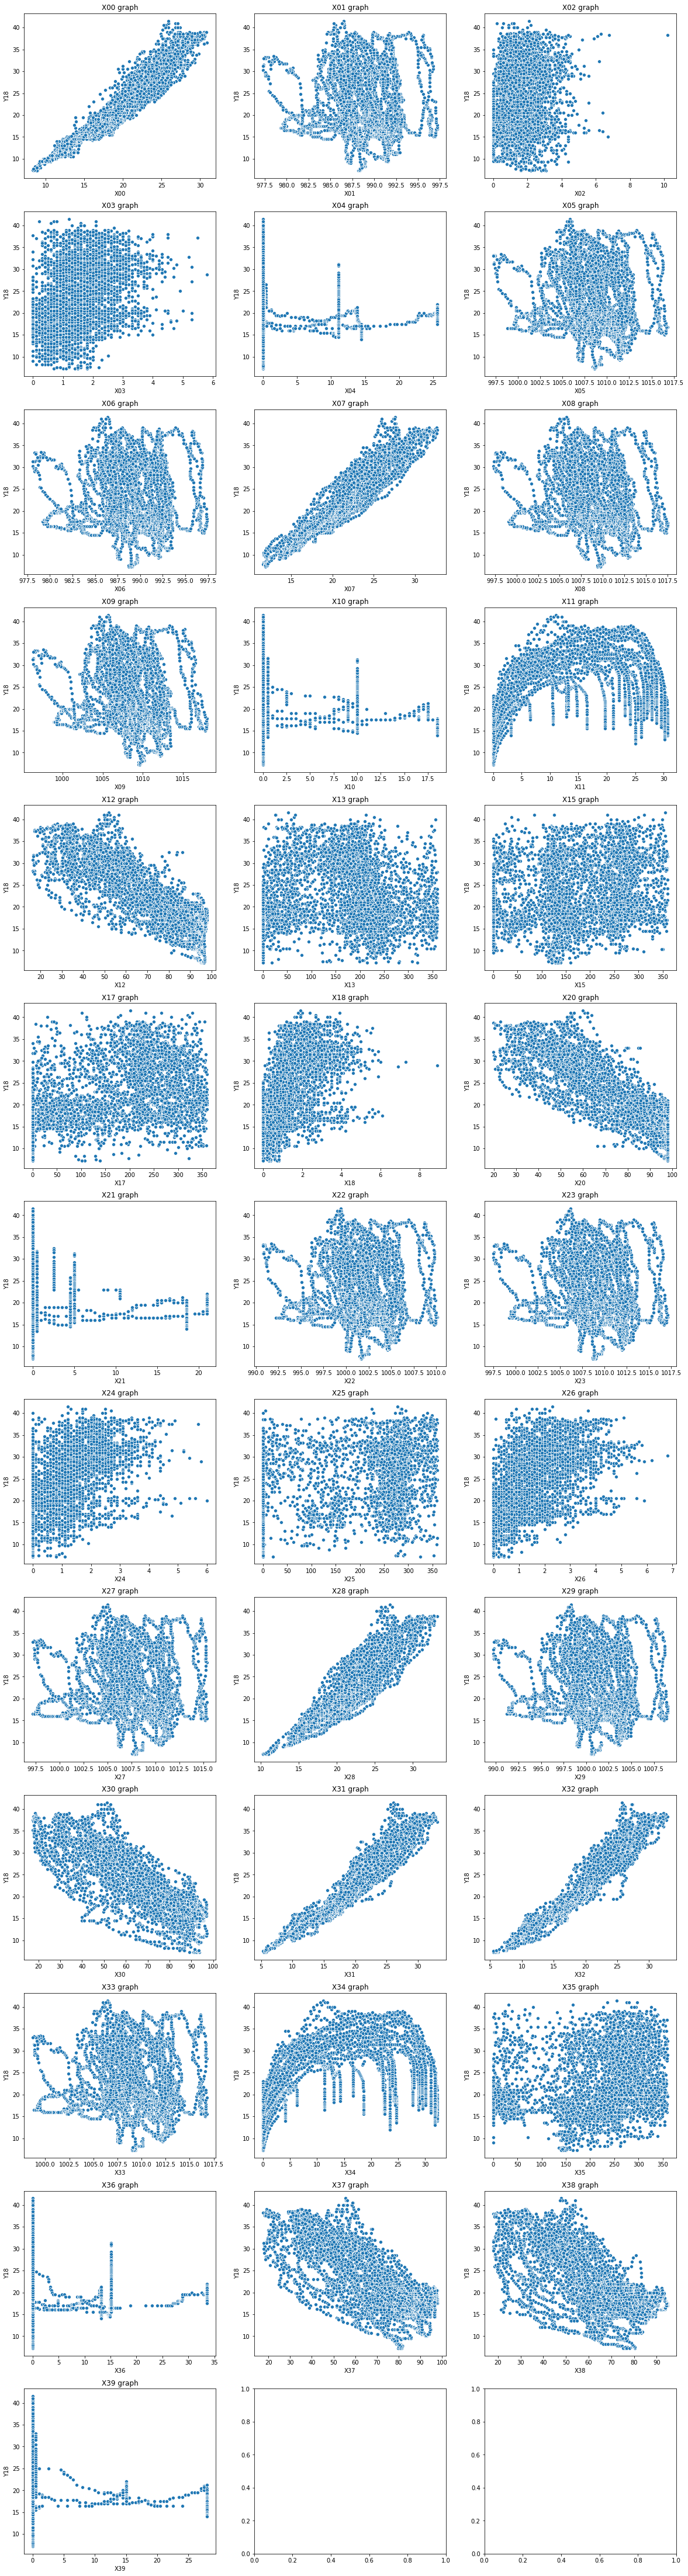

In [22]:
fig, ax = plt.subplots(figsize=(20, 80), nrows=13, ncols=3)

for index, column in enumerate(train.columns[1:38]):
    sns.scatterplot(data=train, x=column, y='Y18', ax=ax[index//3][index%3])
    ax[index//3][index%3].set_title(column + ' graph')


- Y18 컬럼과 선형 관계에 가까운 컬럼이 몇몇 보입니다.
- 모든 컬럼에 outlier 값은 거의 없습니다. 이에 대한 처리는 따로 할 필요가 없을 것 같습니다.
- 각각의 컬럼의 값 크기가 0~6부터 1000을 넘는 값까지 다양하므로 컬럼들을 정규화하는 것을 고려해봐야 합니다.

### 4. id 컬럼을 시간 정보로 변환하기
- 데이터 설명에 따르면 id는 시간 순으로 정렬되어 있으며, 10분 단위로 1씩 증가합니다.
- id 컬럼을 1시간 단위로 나눠 새로운 컬럼 'hour'에 시간을 표시합니다.

In [23]:
train['hour'] = ((train['id'] // 6) % 24).astype(int)
train['hour'].tail(10)

4742    22
4743    22
4744    22
4745    22
4746    23
4747    23
4748    23
4749    23
4750    23
4751    23
Name: hour, dtype: int32

In [24]:
test['hour'] = ((test['id'] // 6) % 24).astype(int)
test['hour'].tail(10)

11510    22
11511    22
11512    22
11513    22
11514    23
11515    23
11516    23
11517    23
11518    23
11519    23
Name: hour, dtype: int32

- 'hour'와 'Y18' 컬럼을 시각화

In [25]:
train.groupby('hour')['Y18'].mean()

hour
0     16.962121
1     16.315657
2     15.848485
3     15.359848
4     14.950758
5     14.768939
6     15.809343
7     17.922980
8     20.742424
9     25.515152
10    28.505051
11    30.678030
12    32.018939
13    32.854798
14    32.537879
15    32.152778
16    30.891414
17    28.842172
18    26.540404
19    23.578283
20    21.340909
21    19.905303
22    18.799242
23    17.996212
Name: Y18, dtype: float64

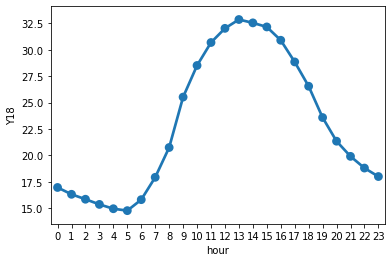

In [26]:
sns.pointplot(data=train.groupby('hour').mean(), x=train.groupby('hour').mean().index, y='Y18')

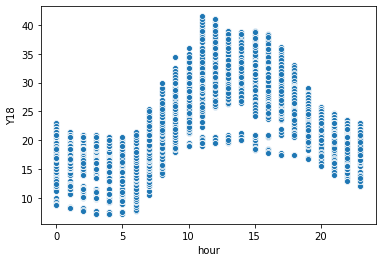

In [27]:
sns.scatterplot(data=train, x='hour', y='Y18')

- 산점도에서 outlier는 없는 것을 알 수 있습니다.

### 5. 상관관계 확인

In [28]:
# 상관계수를 보지 않을 피처 이름을 저장한 리스트 생성
drop_features = ['id']

for i in range(18):
    feature_name = 'Y'
    if i >= 10:
        feature_name = feature_name + str(i)
    else:
        feature_name = feature_name + '0' + str(i)
    
    drop_features.append(feature_name)
    

drop_features

['id',
 'Y00',
 'Y01',
 'Y02',
 'Y03',
 'Y04',
 'Y05',
 'Y06',
 'Y07',
 'Y08',
 'Y09',
 'Y10',
 'Y11',
 'Y12',
 'Y13',
 'Y14',
 'Y15',
 'Y16',
 'Y17']

In [29]:
# 상관계수를 살펴볼 임시 데이터프레임 생성
temp_df = train.drop(drop_features, axis=1)
temp_df.head(3)

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y18,hour
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,101.1,56.1,0.3,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,10.00,0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,165.3,0.0,0.4,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,9.50,0
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,144.0,0.0,0.6,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,9.25,0


In [30]:
temp_df.corr()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y18,hour
X00,1.000000,-0.125318,0.187422,0.388658,-0.102449,-0.165298,-0.133505,0.957922,-0.239435,-0.235810,-0.124220,0.528454,-0.792650,0.003077,0.213658,0.462921,0.529591,-0.819854,-0.115610,-0.137893,-0.167322,0.558890,0.465282,0.602690,-0.128982,0.941699,-0.131479,-0.760738,0.961053,0.963055,-0.139778,0.535151,0.222819,-0.089367,-0.680524,-0.605612,-0.126990,0.950337,0.443839
X01,-0.125318,1.000000,-0.122451,-0.226856,-0.363102,0.995697,0.995284,-0.059634,0.987957,0.991629,-0.306406,-0.089368,-0.042883,0.057005,-0.140213,-0.140250,-0.261884,0.010296,-0.376821,0.996746,0.994673,-0.207541,-0.135235,-0.240379,0.987752,-0.033128,0.996157,-0.075775,-0.105130,-0.101389,0.987361,-0.084825,0.062730,-0.353679,-0.153702,-0.165200,-0.303413,-0.071943,-0.134545
X02,0.187422,-0.122451,1.000000,0.384300,0.025746,-0.131678,-0.112008,0.198243,-0.140902,-0.129738,0.103146,0.206416,-0.331855,-0.081778,-0.027222,0.142006,0.357250,-0.304214,0.043846,-0.127216,-0.130452,0.417393,0.261189,0.400025,-0.098964,0.159586,-0.118983,-0.347745,0.208088,0.210632,-0.107522,0.203104,0.097724,0.011530,-0.311849,-0.244741,0.086012,0.218702,0.127443
X03,0.388658,-0.226856,0.384300,1.000000,0.188856,-0.235420,-0.214740,0.355041,-0.261806,-0.263334,0.207002,0.305377,-0.476940,-0.031160,0.075878,0.317000,0.481811,-0.447811,0.208757,-0.226157,-0.230519,0.500993,0.340838,0.537470,-0.193500,0.332990,-0.214920,-0.456659,0.422510,0.408378,-0.202006,0.306061,0.182478,0.171003,-0.356920,-0.325572,0.240336,0.402590,0.293192
X04,-0.102449,-0.363102,0.025746,0.188856,1.000000,-0.353487,-0.379444,-0.191255,-0.361236,-0.345636,0.815176,-0.154828,0.213551,-0.057953,-0.025699,-0.028532,0.077458,0.219925,0.934104,-0.359630,-0.358470,-0.001960,-0.110434,0.058688,-0.385184,-0.190162,-0.366838,0.242937,-0.092127,-0.117600,-0.383869,-0.151391,-0.287045,0.986345,0.352858,0.342228,0.747254,-0.150368,0.122451
X05,-0.165298,0.995697,-0.131678,-0.235420,-0.353487,1.000000,0.993846,-0.103208,0.991330,0.989875,-0.305937,-0.118443,-0.016912,0.064472,-0.130347,-0.146822,-0.275412,0.036517,-0.368997,0.999523,0.997819,-0.224954,-0.144067,-0.261152,0.990310,-0.081631,0.997119,-0.049668,-0.137724,-0.136712,0.990969,-0.113068,0.066377,-0.342388,-0.122548,-0.132138,-0.296345,-0.104090,-0.154751
X06,-0.133505,0.995284,-0.112008,-0.214740,-0.379444,0.993846,1.000000,-0.062162,0.993103,0.987592,-0.316814,-0.063082,-0.057807,0.063580,-0.136113,-0.128684,-0.254659,-0.007039,-0.385626,0.994807,0.996287,-0.194358,-0.111912,-0.230302,0.995303,-0.033630,0.997819,-0.089769,-0.106901,-0.107461,0.994825,-0.059043,0.094487,-0.371332,-0.173870,-0.188539,-0.303591,-0.076946,-0.117135
X07,0.957922,-0.059634,0.198243,0.355041,-0.191255,-0.103208,-0.062162,1.000000,-0.170789,-0.167017,-0.207529,0.611828,-0.804570,0.015728,0.213902,0.425071,0.474567,-0.802256,-0.184963,-0.074605,-0.105449,0.529697,0.466756,0.547708,-0.053255,0.981081,-0.066768,-0.787334,0.954865,0.962826,-0.065080,0.619764,0.273148,-0.176628,-0.755437,-0.670882,-0.172437,0.936634,0.476619
X08,-0.239435,0.987957,-0.140902,-0.261806,-0.361236,0.991330,0.993103,-0.170789,1.000000,0.991651,-0.299518,-0.125980,0.037836,0.064577,-0.154726,-0.176261,-0.311033,0.085894,-0.368701,0.989144,0.994129,-0.257724,-0.163667,-0.296575,0.987238,-0.140011,0.990973,0.008064,-0.214317,-0.218399,0.988586,-0.122882,0.064397,-0.354037,-0.087405,-0.112510,-0.292166,-0.182114,-0.168395
X09,-0.235810,0.991629,-0.129738,-0.263334,-0.345636,0.989875,0.987592,-0.167017,0.991651,1.000000,-0.286075,-0.147827,0.045362,0.055038,-0.171226,-0.197949,-0.318554,0.096509,-0.358561,0.987752,0.988561,-0.263952,-0.188484,-0.299637,0.978132,-0.138976,0.986825,0.003756,-0.221724,-0.213424,0.977810,-0.144142,0.032285,-0.337738,-0.083464,-0.106376,-0.284817,-0.181406,-0.187344


In [31]:
temp_df.corr()['Y18'].sort_values(ascending=False)

Y18     1.000000
X32     0.953097
X00     0.950337
X31     0.949027
X07     0.936634
X28     0.904607
X26     0.599111
X24     0.594646
X18     0.562488
X25     0.484775
X34     0.481786
X11     0.475636
X17     0.448105
X03     0.402590
hour    0.377433
X35     0.245983
X02     0.218702
X15     0.205704
X13    -0.002401
X27    -0.059966
X33    -0.070842
X29    -0.071704
X01    -0.071943
X06    -0.076946
X22    -0.077778
X05    -0.104090
X23    -0.106716
X36    -0.137779
X39    -0.144979
X04    -0.150368
X21    -0.150630
X10    -0.161163
X09    -0.181406
X08    -0.182114
X38    -0.635311
X37    -0.723794
X30    -0.814290
X20    -0.826807
X12    -0.834143
Name: Y18, dtype: float64

In [32]:
# 상관계수를 절댓값에 따라 정렬
corr_series = temp_df.corr()['Y18']
corr_series[corr_series < 0] = corr_series * -1

corr_series.sort_values(ascending=False)

Y18     1.000000
X32     0.953097
X00     0.950337
X31     0.949027
X07     0.936634
X28     0.904607
X12     0.834143
X20     0.826807
X30     0.814290
X37     0.723794
X38     0.635311
X26     0.599111
X24     0.594646
X18     0.562488
X25     0.484775
X34     0.481786
X11     0.475636
X17     0.448105
X03     0.402590
hour    0.377433
X35     0.245983
X02     0.218702
X15     0.205704
X08     0.182114
X09     0.181406
X10     0.161163
X21     0.150630
X04     0.150368
X39     0.144979
X36     0.137779
X23     0.106716
X05     0.104090
X22     0.077778
X06     0.076946
X01     0.071943
X29     0.071704
X33     0.070842
X27     0.059966
X13     0.002401
Name: Y18, dtype: float64

### 6. 피처 스케일링(정규화)

In [33]:
columns = []

for i in range(40):
    if i == 14 or i == 16 or i == 19:
        continue
    if i < 10:
        columns.append('X0' + str(i))
    else:
        columns.append('X' + str(i))
columns


['X00',
 'X01',
 'X02',
 'X03',
 'X04',
 'X05',
 'X06',
 'X07',
 'X08',
 'X09',
 'X10',
 'X11',
 'X12',
 'X13',
 'X15',
 'X17',
 'X18',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39']

In [34]:
for column in columns:
    min_data = train[column].min()
    max_data = train[column].max()
    
    train[column] = (train[column] - min_data) / (max_data - min_data)
    test[column] = (test[column] - min_data) / (max_data - min_data)
train.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,hour
0,0,0.061947,0.577889,0.117647,0.103448,0.0,0.617347,0.595855,0.028436,0.623762,0.622120,0.0,0.0,0.809816,0.198056,0.280911,0.155833,0.033708,0.911765,0.0,0.606218,0.627551,0.183333,0.006391,0.073529,0.631868,0.087336,0.616580,0.647870,0.104317,0.189781,0.629834,0.0,0.712420,0.0,0.743462,0.581274,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,10.00,0
1,1,0.044248,0.582915,0.166667,0.327586,0.0,0.617347,0.595855,0.023697,0.628713,0.626728,0.0,0.0,0.795092,0.338333,0.459294,0.000000,0.044944,0.923274,0.0,0.606218,0.632653,0.000000,0.000000,0.000000,0.631868,0.078603,0.621762,0.662907,0.107914,0.175182,0.629834,0.0,0.598500,0.0,0.744707,0.592978,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,9.50,0
2,2,0.048673,0.587940,0.107843,0.396552,0.0,0.612245,0.601036,0.023697,0.633663,0.635945,0.0,0.0,0.855215,0.644444,0.400111,0.000000,0.067416,0.941176,0.0,0.601036,0.627551,0.000000,0.000000,0.000000,0.626374,0.078603,0.616580,0.677945,0.097122,0.153285,0.624309,0.0,0.653515,0.0,0.744707,0.598179,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,9.25,0
3,3,0.048673,0.582915,0.147059,0.120690,0.0,0.612245,0.595855,0.018957,0.628713,0.631336,0.0,0.0,0.874847,0.000000,0.322034,0.816944,0.011236,0.942455,0.0,0.601036,0.622449,0.000000,0.000000,0.029412,0.631868,0.078603,0.611399,0.699248,0.086331,0.142336,0.629834,0.0,0.594610,0.0,0.747198,0.605982,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,9.00,0
4,4,0.039823,0.582915,0.078431,0.293103,0.0,0.612245,0.601036,0.018957,0.633663,0.631336,0.0,0.0,0.889571,0.000000,0.346485,0.000000,0.000000,0.951407,0.0,0.601036,0.622449,0.000000,0.000000,0.000000,0.631868,0.074236,0.611399,0.713033,0.075540,0.142336,0.629834,0.0,0.485968,0.0,0.753425,0.612484,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,8.75,0


In [35]:
test.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,hour
0,4752,0.460177,0.507538,0.147059,0.224138,0.0,0.489796,0.497409,0.450237,0.50495,0.502304,0.0,0.0,0.977914,0.926667,0.554598,0.100000,0.123596,0.959079,0.0,0.492228,0.515306,0.0,0.0,0.014706,0.483516,0.563319,0.507772,0.927318,0.438849,0.500000,0.491713,0.0,0.540984,0.0,0.828144,0.546164,0.0,0
1,4753,0.464602,0.507538,0.107843,0.206897,0.0,0.484694,0.497409,0.454976,0.50495,0.502304,0.0,0.0,0.979141,0.931944,0.539039,0.354722,0.067416,0.966752,0.0,0.487047,0.510204,0.0,0.0,0.044118,0.478022,0.558952,0.502591,0.929825,0.435252,0.496350,0.486188,0.0,0.480967,0.0,0.828144,0.553966,0.0,0
2,4754,0.473451,0.507538,0.127451,0.206897,0.0,0.479592,0.492228,0.454976,0.50000,0.502304,0.0,0.0,0.981595,0.000000,0.480411,0.163889,0.000000,0.948849,0.0,0.481865,0.505102,0.0,0.0,0.102941,0.478022,0.558952,0.497409,0.934837,0.428058,0.492701,0.486188,0.0,0.579605,0.0,0.840598,0.557867,0.0,0
3,4755,0.460177,0.507538,0.225490,0.137931,0.0,0.479592,0.492228,0.450237,0.50000,0.502304,0.0,0.0,0.982822,0.702500,0.426507,0.152500,0.044944,0.955243,0.0,0.481865,0.505102,0.0,0.0,0.088235,0.472527,0.545852,0.497409,0.947368,0.428058,0.485401,0.480663,0.0,0.514032,0.0,0.850560,0.563069,0.0,0
4,4756,0.446903,0.507538,0.107843,0.120690,0.0,0.484694,0.497409,0.440758,0.50495,0.502304,0.0,0.0,0.984049,0.661667,0.482912,0.135556,0.089888,0.971867,0.0,0.487047,0.500000,0.0,0.0,0.102941,0.478022,0.545852,0.492228,0.938596,0.435252,0.489051,0.486188,0.0,0.452348,0.0,0.869240,0.569571,0.0,0


# 평가 함수

In [36]:
import numpy as np

def mse_AIFrenz(y_true, y_pred):
    '''
    y_true: 실제 값
    y_pred: 예측 값
    '''
    diff = abs(y_true - y_pred)
    
    less_then_one = np.where(diff < 1, 0, diff)
    
    # multi-column일 경우에도 계산 할 수 있도록 np.average를 한번 더 씌움
    score = np.average(np.average(less_then_one ** 2, axis = 0))
    
    return score

In [37]:
def evaluate_mse_AI(y,pred):
    mse_AI = mse_AIFrenz(y,pred)
    
    print('mseAI : {0:.3f}'.format(mse_AI))

# 학습 / 예측

In [38]:
drop_features = []

for i in range(18):
    feature_name = 'Y'
    if i >= 10:
        feature_name = feature_name + str(i)
    else:
        feature_name = feature_name + '0' + str(i)
    
    drop_features.append(feature_name)
    

drop_features

['Y00',
 'Y01',
 'Y02',
 'Y03',
 'Y04',
 'Y05',
 'Y06',
 'Y07',
 'Y08',
 'Y09',
 'Y10',
 'Y11',
 'Y12',
 'Y13',
 'Y14',
 'Y15',
 'Y16',
 'Y17']

In [39]:
train = train.drop(drop_features, axis=1)

In [41]:
y_data = train['Y18']
X_data = train.drop(['id', 'Y18', 'hour'], axis=1)

In [42]:
X_data.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,0.061947,0.577889,0.117647,0.103448,0.0,0.617347,0.595855,0.028436,0.623762,0.622120,0.0,0.0,0.809816,0.198056,0.280911,0.155833,0.033708,0.911765,0.0,0.606218,0.627551,0.183333,0.006391,0.073529,0.631868,0.087336,0.616580,0.647870,0.104317,0.189781,0.629834,0.0,0.712420,0.0,0.743462,0.581274,0.0
1,0.044248,0.582915,0.166667,0.327586,0.0,0.617347,0.595855,0.023697,0.628713,0.626728,0.0,0.0,0.795092,0.338333,0.459294,0.000000,0.044944,0.923274,0.0,0.606218,0.632653,0.000000,0.000000,0.000000,0.631868,0.078603,0.621762,0.662907,0.107914,0.175182,0.629834,0.0,0.598500,0.0,0.744707,0.592978,0.0
2,0.048673,0.587940,0.107843,0.396552,0.0,0.612245,0.601036,0.023697,0.633663,0.635945,0.0,0.0,0.855215,0.644444,0.400111,0.000000,0.067416,0.941176,0.0,0.601036,0.627551,0.000000,0.000000,0.000000,0.626374,0.078603,0.616580,0.677945,0.097122,0.153285,0.624309,0.0,0.653515,0.0,0.744707,0.598179,0.0
3,0.048673,0.582915,0.147059,0.120690,0.0,0.612245,0.595855,0.018957,0.628713,0.631336,0.0,0.0,0.874847,0.000000,0.322034,0.816944,0.011236,0.942455,0.0,0.601036,0.622449,0.000000,0.000000,0.029412,0.631868,0.078603,0.611399,0.699248,0.086331,0.142336,0.629834,0.0,0.594610,0.0,0.747198,0.605982,0.0
4,0.039823,0.582915,0.078431,0.293103,0.0,0.612245,0.601036,0.018957,0.633663,0.631336,0.0,0.0,0.889571,0.000000,0.346485,0.000000,0.000000,0.951407,0.0,0.601036,0.622449,0.000000,0.000000,0.000000,0.631868,0.074236,0.611399,0.713033,0.075540,0.142336,0.629834,0.0,0.485968,0.0,0.753425,0.612484,0.0


In [43]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

# feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.3, random_state=0)

In [44]:

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_mse_AI(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=False)

### LinearRegression ###
mseAI : 2.172
### Ridge ###
mseAI : 2.673
### Lasso ###
mseAI : 2.660


In [45]:
## 가장 성적이 좋은 LinearRegression(), 전체 데이터로 학습
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.3, random_state=0)

lr_reg = LinearRegression()
get_model_predict(lr_reg ,X_train, X_test, y_train, y_test,is_expm1=False)

### LinearRegression ###
mseAI : 2.172


# 제출용 csv 파일 생성하기

In [47]:
#x_t = test.drop('id', axis=1)
x_t = test.drop(['id', 'hour'], axis=1)
sub = test[['id']]

sub['Y18'] =lr_reg.predict(x_t) ## 여기 모델명을 바꿔주자

sub.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,Y18
0,4752,19.824839
1,4753,19.587137
2,4754,19.650571
3,4755,19.272665
4,4756,19.018654


In [48]:
sub.to_csv("./data/answer.csv", index=False)